### Hair Loss by Smoking Status, Weight Loss, and Environmental Factors

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("CleanedHair.csv")
df  #.head()

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,1,0,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,1,1,1,1,1
995,1,1,No Data,Accutane,Protein deficiency,Low,47,0,0,0,1,0
996,0,1,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,1,0,1,1,1
997,0,1,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,1,1,1,1,1


---

### Hair Loss by Age Group

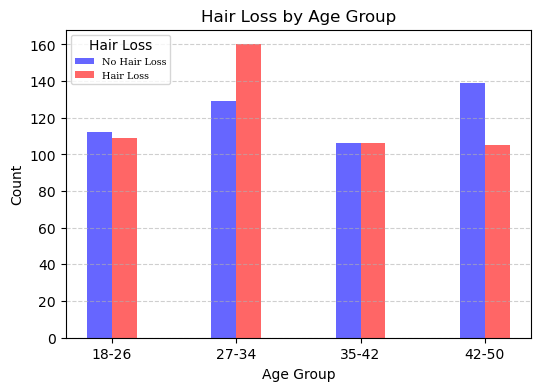

In [2]:
#Hair Loss by Age Group
#Setup the age group
bins = [18, 26, 35, 42, 50]
labels = ["18-26", "27-34", "35-42", "42-50"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

#Grouping
Hair_Loss_count = df.groupby(["Age Group", "Hair Loss"]).size().unstack(fill_value=0)

#Plot bars next to each other
bar_width = 0.2
age_groups =np.arange(len(labels))

plt.figure(figsize=(6,4))

#Plot "No smoking" bars
plt.bar(age_groups - bar_width/2, Hair_Loss_count[0], width=bar_width, label="No Hair Loss", color="Blue", alpha=0.6)

#Plot "smoking" bars
plt.bar(age_groups + bar_width/2, Hair_Loss_count[1], width=bar_width, label="Hair Loss", color="Red", alpha=0.6)

#Labels and title
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Hair Loss by Age Group")
plt.xticks(ticks=age_groups, labels=labels)
plt.legend(title="Hair Loss", prop={'family': 'serif', 'size': 7})
#plt.legend(loc='upper left', prop={'family': 'serif', 'size': 12}) 
plt.grid(axis="y", linestyle="--", alpha=0.6)

#Show plot
plt.show()

In [3]:
# By comparing the bars for each age group, the chart helps identify trends in hair loss prevalence across different age ranges, 
# showing whether hair loss is more common in certain age groups.

---

### Comparison of Hair Loss by Smoking Status

<Figure size 800x500 with 0 Axes>

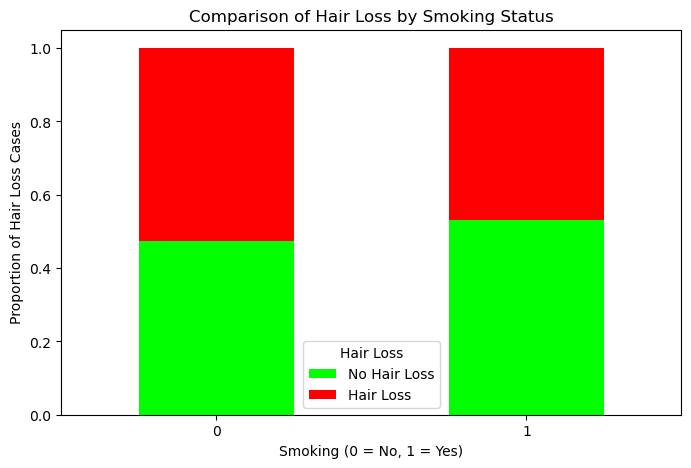

Hair Loss         0         1
Smoking                      
0          0.472917  0.527083
1          0.529865  0.470135


In [4]:
#Compute the percentage of hair loss occurrences for smokers vs non-smokers
smoking_hairloss = df.groupby("Smoking")["Hair Loss"].value_counts(normalize=True).unstack()
# .value_counts(normalize=True):
# Counts the occurrences of each "Hair Loss" category (0 or 1) within each "Smoking" group.
# normalize=True converts the counts into proportions (percentages) instead of raw counts.

custom_colors = ["#00FF00", "#FF0000"]  # Green for No Hair Loss, Red for Hair Loss

# Plot the relationship
plt.figure(figsize=(8, 5))
smoking_hairloss.plot(kind='bar', stacked=True, color=custom_colors, figsize=(8,5))
#smoking_hairloss.plot(kind='bar', stacked=True, colormap="coolwarm", figsize=(8,5))
plt.title("Comparison of Hair Loss by Smoking Status")
plt.xlabel("Smoking (0 = No, 1 = Yes)")
plt.ylabel("Proportion of Hair Loss Cases")
plt.legend(title="Hair Loss", labels=["No Hair Loss", "Hair Loss"])
plt.xticks(rotation=0)
plt.show()

# Display numerical summary
print(smoking_hairloss)

In [5]:
# Smoking Status	No Hair Loss (0)	Hair Loss (1)
# 0 (Non-Smokers)	          47.29%	       52.71%
# 1 (Smokers)	              52.99%	       47.01%

In [6]:
# Description of the Chart: Hair Loss and Smoking Relationship
# The bar chart illustrates the relationship between smoking status and hair loss. The x-axis represents smoking status, 
# where 0 = Non-smokers and 1 = Smokers. The y-axis indicates the proportion of individuals experiencing hair loss versus those who do not.
# Each bar is divided into two stacked segments:
# Green (#2ca02c) represents individuals with no hair loss.
# Red (#d62728) represents individuals experiencing hair loss.
# From the chart, we can observe the proportional differences in hair loss prevalence between smokers and non-smokers. 
# If the red segment is significantly larger for smokers, it suggests a higher incidence of hair loss among smokers compared to non-smokers. 
# Conversely, if both groups show similar proportions, smoking may have a weaker correlation with hair loss.
# This visualization helps in understanding whether smoking is a potential risk factor for hair loss based

---

### Comparison of Hair Loss by Weight Loss

<Figure size 800x500 with 0 Axes>

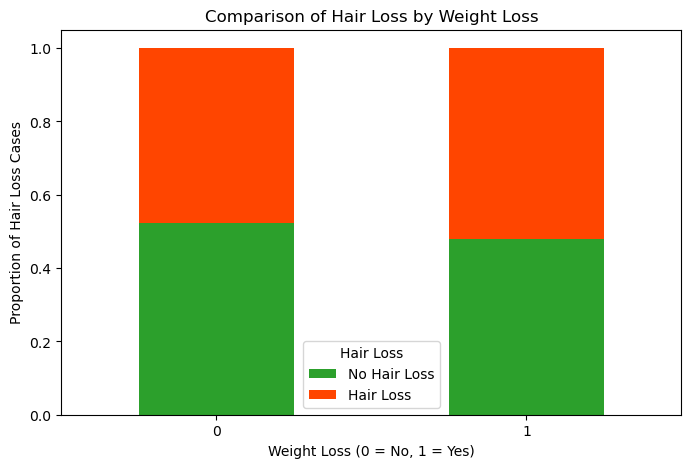

Hair Loss           0         1
Weight Loss                    
0            0.523719  0.476281
1            0.478814  0.521186


In [7]:
#Compute the percentage of hair loss occurrences for Weight Loss vs No Weight Loss
Weight_Loss_hairloss = df.groupby("Weight Loss")["Hair Loss"].value_counts(normalize=True).unstack()

custom_colors = ["#2ca02c", "#FF4500"]  # Green for No Hair Loss, Red-Orange for Hair Loss

plt.figure(figsize=(8, 5))
Weight_Loss_hairloss.plot(kind='bar', stacked=True, color=custom_colors, figsize=(8,5))
#Weight_Loss_hairloss.plot(kind='bar', stacked=True, colormap="coolwarm", figsize=(8,5))
plt.title("Comparison of Hair Loss by Weight Loss")
plt.xlabel("Weight Loss (0 = No, 1 = Yes)")
plt.ylabel("Proportion of Hair Loss Cases")
plt.legend(title="Hair Loss", labels=["No Hair Loss", "Hair Loss"])
plt.xticks(rotation=0)
plt.show()

# Display numerical summary
print(Weight_Loss_hairloss)

In [8]:
# Weight Loss	No Hair Loss (0)	Hair Loss (1)
# 0 (No Weight Loss)	52.37%	47.63%
# 1 (Experienced Weight Loss)	47.88%	52.12%

In [9]:
# This stacked bar chart visualizes the relationship between weight loss and hair loss. The x-axis represents 
# weight loss status (0 = No weight loss, 1 = Experienced weight loss), while the y-axis shows the proportion of individuals with and without hair loss.
# Green (#2ca02c): No Hair Loss
# Red (#d62728): Hair Loss
# The chart helps identify whether weight loss is associated with increased hair loss. If the red portion is significantly larger for those 
# who experienced weight loss, it suggests a higher likelihood of hair loss due to weight loss.

---

### Comparison of Hair Loss by Environmental Factors

<Figure size 800x500 with 0 Axes>

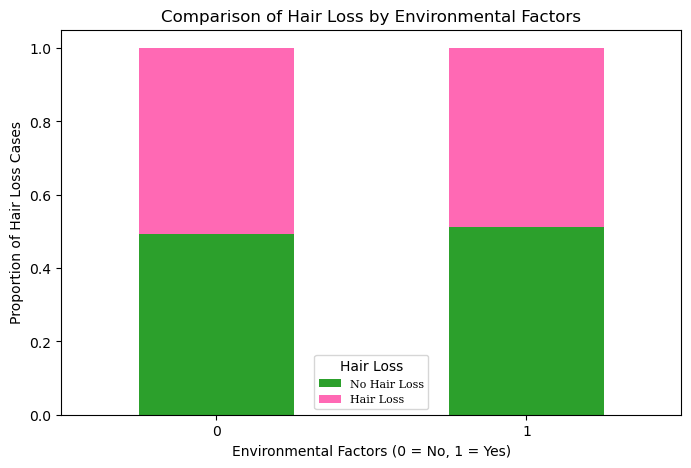

Hair Loss                     0         1
Environmental Factors                    
0                      0.492872  0.507128
1                      0.511811  0.488189


In [10]:
#Compute the percentage of hair loss occurrences for Environmental Factors
Environmental_Factors_hairloss = df.groupby("Environmental Factors")["Hair Loss"].value_counts(normalize=True).unstack()

custom_colors = ["#2ca02c", "#FF69B4"]  # Green for No Hair Loss, Hot Pink for Hair Loss

# Plot the relationship
plt.figure(figsize=(8, 5))
Environmental_Factors_hairloss.plot(kind='bar', stacked=True, color=custom_colors, figsize=(8,5))
#Environmental_Factors_hairloss.plot(kind='bar', stacked=True, colormap="coolwarm", figsize=(8,5))
plt.title("Comparison of Hair Loss by Environmental Factors")
plt.xlabel("Environmental Factors (0 = No, 1 = Yes)")
plt.ylabel("Proportion of Hair Loss Cases")
plt.legend(title="Hair Loss", labels=["No Hair Loss", "Hair Loss"],  prop={'family': 'serif', 'size': 8})
plt.xticks(rotation=0)
plt.show()

# Display numerical summary
print(Environmental_Factors_hairloss)

In [11]:
# No Hair Loss (0)	Hair Loss (1)
# 0 (No Exposure)	49.29%	50.71%
# 1 (Exposed)	51.18%	48.82%

In [12]:
# This stacked bar chart illustrates the relationship between environmental factors and hair loss. The x-axis represents exposure to environmental 
# factors (0 = No exposure, 1 = Exposed), while the y-axis shows the proportion of individuals experiencing hair loss.
# Coolwarm colormap visually differentiates individuals with and without hair loss.
# The chart helps determine whether environmental factors (such as pollution, UV exposure, or chemicals) contribute to an increased risk 
# of hair loss. If the proportion of hair loss is significantly higher in the exposed group, it suggests a strong correlation between 
# environmental factors and hair health.